In [1]:
# importing the necessary libraries

!pip install wordcloud
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
from wordcloud import WordCloud
import nltk
nltk.download(['stopwords',
              'punkt',
              'wordnet',
              'omw-1.4',
              'vader_lexicon'
              ])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\modup\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\modup\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\modup\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\modup\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\modup\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [4]:
# Reading the Data to use for the analysis

reviews = pd.read_csv('amazon-uk-shoes-product-reviews-dataset.csv')
reviews.head()

,product_name,review_date,reviewer_name,review_title,review_text,verified_purchase
0,Klasified Women's Transparent Clear Sneaker Sh...,Reviewed in the United States on 2 June 2020,Jocelyn McSayles,Love em,Love these. Was looking for converses and thes...,True
1,Klasified Women's Transparent Clear Sneaker Sh...,Reviewed in the United States on 28 October 2021,Kenia Rivera,The plastic ripped,"The shoes are very cute, but after the 2nd day...",True
2,Klasified Women's Transparent Clear Sneaker Sh...,Reviewed in the United States on 20 January 2021,Chris Souza,Good quality,Good quality,True
3,Klasified Women's Transparent Clear Sneaker Sh...,Reviewed in the United States on 22 April 2021,Amazon Customer,Good,Great,True
4,"Aravon Women's Betty-AR Oxfords, Stone, 5.5 UK",Reviewed in the United States on 27 August 2020,Burger Lover - Dalton,Great quality and comfort shoes,Great quality and comfort shoesI was so thrill...,True


In [5]:
#To get a general summary of the dataframe

reviews.describe()

,product_name,review_date,reviewer_name,review_title,review_text,verified_purchase
count,3242,3242,3242,3241,3242,3242
unique,592,1335,2774,2711,3133,2
top,MEBIKE Women Cycling Shoes Lady Road Bike Shoe...,Reviewed in the United States on 3 May 2021,Amazon Customer,Five Stars,Great,True
freq,10,11,218,49,4,3230


In [6]:
# to view the polarity scores of the reviews while creating new columns within dataframe 

from nltk.sentiment.vader import SentimentIntensityAnalyzer

sentiment = SentimentIntensityAnalyzer()

reviews['compound'] = [sentiment.polarity_scores(review)['compound'] for review in reviews['review_text']]
reviews['neg'] = [sentiment.polarity_scores(review)['neg'] for review in reviews['review_text']]
reviews['neu'] = [sentiment.polarity_scores(review)['neu'] for review in reviews['review_text']]
reviews['pos'] = [sentiment.polarity_scores(review)['pos'] for review in reviews['review_text']]

In [7]:
reviews.head()

,product_name,review_date,reviewer_name,review_title,review_text,verified_purchase,compound,neg,neu,pos
0,Klasified Women's Transparent Clear Sneaker Sh...,Reviewed in the United States on 2 June 2020,Jocelyn McSayles,Love em,Love these. Was looking for converses and thes...,True,0.8517,0.034,0.710,0.256
1,Klasified Women's Transparent Clear Sneaker Sh...,Reviewed in the United States on 28 October 2021,Kenia Rivera,The plastic ripped,"The shoes are very cute, but after the 2nd day...",True,0.6593,0.000,0.926,0.074
2,Klasified Women's Transparent Clear Sneaker Sh...,Reviewed in the United States on 20 January 2021,Chris Souza,Good quality,Good quality,True,0.4404,0.000,0.256,0.744
3,Klasified Women's Transparent Clear Sneaker Sh...,Reviewed in the United States on 22 April 2021,Amazon Customer,Good,Great,True,0.6249,0.000,0.000,1.000
4,"Aravon Women's Betty-AR Oxfords, Stone, 5.5 UK",Reviewed in the United States on 27 August 2020,Burger Lover - Dalton,Great quality and comfort shoes,Great quality and comfort shoesI was so thrill...,True,0.9949,0.021,0.695,0.284


In [8]:
reviews[['compound','neg','neu','pos']].describe()

,compound,neg,neu,pos
count,3242.000000,3242.000000,3242.000000,3242.000000
mean,0.531287,0.044099,0.696755,0.259137
std,0.493333,0.077361,0.202788,0.216755
min,-0.983600,0.000000,0.000000,0.000000
25%,0.294250,0.000000,0.608000,0.109000
50%,0.735100,0.000000,0.742000,0.205000
75%,0.908775,0.067000,0.828000,0.353750
max,0.998300,1.000000,1.000000,1.000000


<Axes: xlabel='compound', ylabel='Count'>

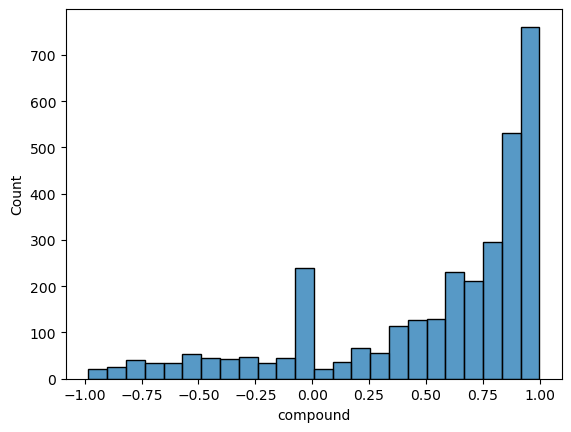

In [9]:
# To view the distribution of the compound reviews

sns.histplot(reviews['compound'])

<Axes: xlabel='pos', ylabel='Count'>

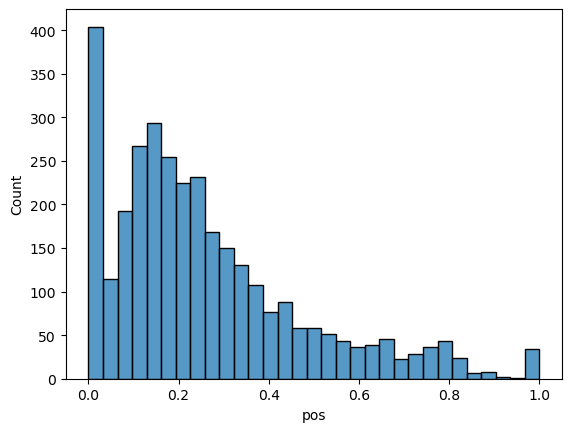

In [10]:
# Viewing a distribution of the positive reviews

sns.histplot(reviews['pos'])

<Axes: xlabel='neg', ylabel='Count'>

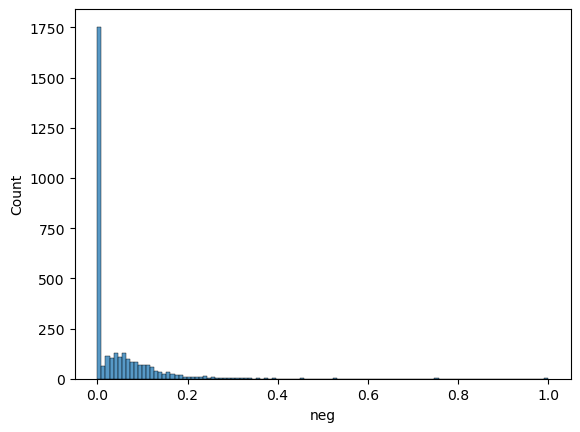

In [11]:
# a negative distribution of reviews

sns.histplot(reviews['neg'])

<Axes: xlabel='neu', ylabel='Count'>

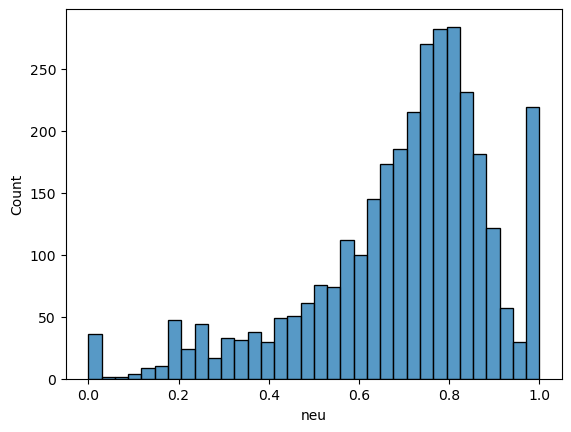

In [12]:
# viewing the distribution of neutral reviews

sns.histplot(reviews['neu'])

In [13]:
# checking how many negative reviews per product
(reviews['compound']<=0).groupby(reviews['product_name']).sum()

product_name
': 'ZAPATILLA NEW BALANCE KV220, Navy/White, 9.5 UK Child                                                             2
ALLY UNION MAKE FORCE Mens Womens Walking Shoes Lightweight Mesh Slip-on Running Sneakers Gray Size: 8 Women/7 Men    2
ANNE KLEIN Women's Anne Kleon Onthego Sneaker, Navy, 7.5 UK                                                           0
ANNE KLEIN Women's Terri Sneaker, Grey Heathered, 4 UK                                                                4
APEX LEGENDS Women's Breeze Athletic Knit Running Shoe Sneaker, Grey, 7.5 UK                                          0
                                                                                                                     ..
adidas unisex child Terrex Hyperhiker Low Hiking Shoe, Grey/Black/Grey, 11 Little Kid US                              0
adidas unisex-child Duramo SL,Black/Black/Grey,10.5 M US                                                              1
adidas unisex-child Racer T

In [14]:
# checking how many positive reviews per product
(reviews['compound']>=0).groupby(reviews['product_name']).sum()

product_name
': 'ZAPATILLA NEW BALANCE KV220, Navy/White, 9.5 UK Child                                                             6
ALLY UNION MAKE FORCE Mens Womens Walking Shoes Lightweight Mesh Slip-on Running Sneakers Gray Size: 8 Women/7 Men    8
ANNE KLEIN Women's Anne Kleon Onthego Sneaker, Navy, 7.5 UK                                                           1
ANNE KLEIN Women's Terri Sneaker, Grey Heathered, 4 UK                                                                6
APEX LEGENDS Women's Breeze Athletic Knit Running Shoe Sneaker, Grey, 7.5 UK                                          2
                                                                                                                     ..
adidas unisex child Terrex Hyperhiker Low Hiking Shoe, Grey/Black/Grey, 11 Little Kid US                              4
adidas unisex-child Duramo SL,Black/Black/Grey,10.5 M US                                                              9
adidas unisex-child Racer T

In [15]:
# checking how many neutral reviews per product
(reviews['compound'] ==0).groupby(reviews['product_name']).sum()

product_name
': 'ZAPATILLA NEW BALANCE KV220, Navy/White, 9.5 UK Child                                                             0
ALLY UNION MAKE FORCE Mens Womens Walking Shoes Lightweight Mesh Slip-on Running Sneakers Gray Size: 8 Women/7 Men    0
ANNE KLEIN Women's Anne Kleon Onthego Sneaker, Navy, 7.5 UK                                                           0
ANNE KLEIN Women's Terri Sneaker, Grey Heathered, 4 UK                                                                1
APEX LEGENDS Women's Breeze Athletic Knit Running Shoe Sneaker, Grey, 7.5 UK                                          0
                                                                                                                     ..
adidas unisex child Terrex Hyperhiker Low Hiking Shoe, Grey/Black/Grey, 11 Little Kid US                              0
adidas unisex-child Duramo SL,Black/Black/Grey,10.5 M US                                                              0
adidas unisex-child Racer T

In [16]:
# calculate percentage of negative reviews per product

percent_negative = pd.DataFrame((reviews['compound']<=0).groupby(reviews['product_name']).sum()
                               /reviews['product_name'].groupby(reviews['product_name']).count()*100,
                               columns=['% negative reviews']).sort_values(by='% negative reviews')

percent_negative

,% negative reviews
product_name,
"Klasified Women's Transparent Clear Sneaker Shoe, White, 5.5 UK",0.0
adidas Kids' Adissage,0.0
"Fergie Women's Shortly Slip-ons Loafer, Blue Tye Dye, 4.5 UK",0.0
OshKosh B'Gosh Unisex-Child Bia Bump Toe Mary Jane Flat pink Size: 4 Toddler,0.0
"adidas Daily 3.0 Skate Shoe, Grey, 3 US Unisex Little Kid",0.0
...,...
"DKNY Women's Lightweight Slip on Fashion Sneaker, Military Green Abbi, 6.5",100.0
"Creative Recreation Women's Cesario Lo XVI Classic Sneaker, White, 10",100.0
Converse Chuck Taylor All Star Low Top,100.0


In [22]:
# calculate percentage of neutral reviews per product


percent_neutral = pd.DataFrame((reviews['compound']==0).groupby(reviews['product_name']).sum()
                               /reviews['product_name'].groupby(reviews['product_name']).count()*100,
                               columns=['% neutral reviews']).sort_values(by='% neutral reviews')

percent_neutral

,% neutral reviews
product_name,
"': 'ZAPATILLA NEW BALANCE KV220, Navy/White, 9.5 UK Child",0.0
"Reebok Men's JJ III Cross Trainer, Chalk/Black Rubber Gum, 7.5 UK",0.0
Reebok Men's Fusium Run Sneaker blue Size: 12 UK,0.0
"Reebok Men's FLEXAGON Force 2.0 Cross Trainer, Black/True Grey/Primal Red, 6.5 UK",0.0
"Reebok Men's Club MEMT Wide 4e Sneaker, Black/DGH Solid Grey, 6.5 UK",0.0
...,...
"Kenneth Cole New York Women's Kam Double Strap Sneaker, White Camo, 8 UK",100.0
"Desconocido Women's Multisport W148 Kso Lace-Up Flats black Size:, Negro (Schwarz (Black)), 2 UK (34 EU)",100.0
"Kamik Boy's Unisex Kids Cassia NF8080 Snow Boot, Grey BLK, 10.5 UK Child",100.0


In [21]:
# To view the percentage negative reviewed products between 0 and 20

filtered_percent_negative = percent_negative[(percent_negative['% negative reviews'] > 0) & (percent_negative['% negative reviews'] < 20)]

print(filtered_percent_negative)

                                                    % negative reviews
product_name                                                          
Saucony Women's Endorphin MD4 Track Spike Racin...           10.000000
RF ROOM OF FASHION Women's Casual Low Top Trend...           10.000000
Reebok Women's Sole Fury TS Cross Trainer, Whit...           10.000000
Sperry Women's Crest Striper II CVO Sneaker, Oa...           10.000000
New Balance 519v1 Running Shoe, Black/Rainbow, ...           10.000000
...                                                                ...
adidas Women's Ligra 6 Volleyball Shoe, White/W...           16.666667
Reebok Women's Fusion Flexweave Running Shoe, S...           16.666667
Reebok Women's Cloudride DMX 4.0 Walking Shoe, ...           16.666667
New Balance Women's 1365v1 Walking Shoe, Chambr...           16.666667
New Balance Men's 500v7 Track and Field Shoe, W...           16.666667

[97 rows x 1 columns]


In [23]:
# To view the percentage neutral reviewed products between 1 and 10%

filtered_percent_neutral = percent_neutral[(percent_neutral['% neutral reviews'] > 1) & (percent_neutral['% neutral reviews'] < 12)]

print(filtered_percent_neutral)

                                                    % neutral reviews
product_name                                                         
Sperry Women's Crest Striper II CVO Sneaker, Oa...          10.000000
Reebok Women's RCF LITE LO TR Poly-W, Citrus Gl...          10.000000
Propét Women's TravelActiv Axial Sneaker, Navy/...          10.000000
Bloch Women's Broadway Hi Dance Shoe, Tan, 8.5 UK           10.000000
Florsheim Midtown Plain Oxford Jr, Black, 10.5 ...          10.000000
ASICS 1014A029 Kid's Amplica GS Running Shoe, D...          10.000000
Clarks - Mens Un Larvik Top2 Boots, 10 UK, Grey...          10.000000
HUMTTO Women's Outdoor Sport Sandals Knitted fo...          10.000000
UGG K Cozy II Leopard Open Back Slippers, Multi...          10.000000
adidas Originals Men's Tubular Radial Fashion S...          10.000000
Merrell Kid's Trail Quest Hiking Sneaker, Navy/...          10.000000
Merrell Kids&#39; Trail Quest Shoes                         10.000000
adidas unisex child 

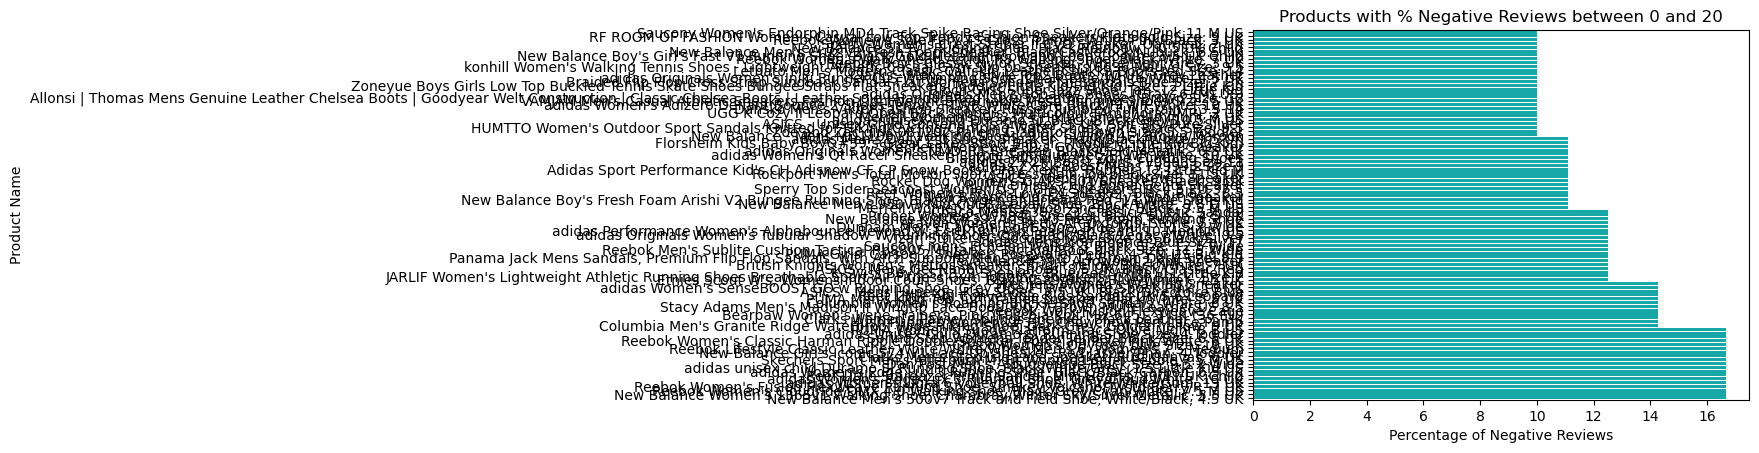

In [24]:
# using seaborn,this information can be plotted on a graph horizontally

# Assuming 'percent_negative' is your DataFrame
filtered_percent_negative = percent_negative[(percent_negative['% negative reviews'] > 0) & (percent_negative['% negative reviews'] < 20)]

# Plotting the horizontal barplot
sns.barplot(x='% negative reviews', y=filtered_percent_negative.index, data=filtered_percent_negative, color='c')

# Adding labels and title
plt.xlabel('Percentage of Negative Reviews')
plt.ylabel('Product Name')
plt.title('Products with % Negative Reviews between 0 and 20')

# Display the plot
plt.show()


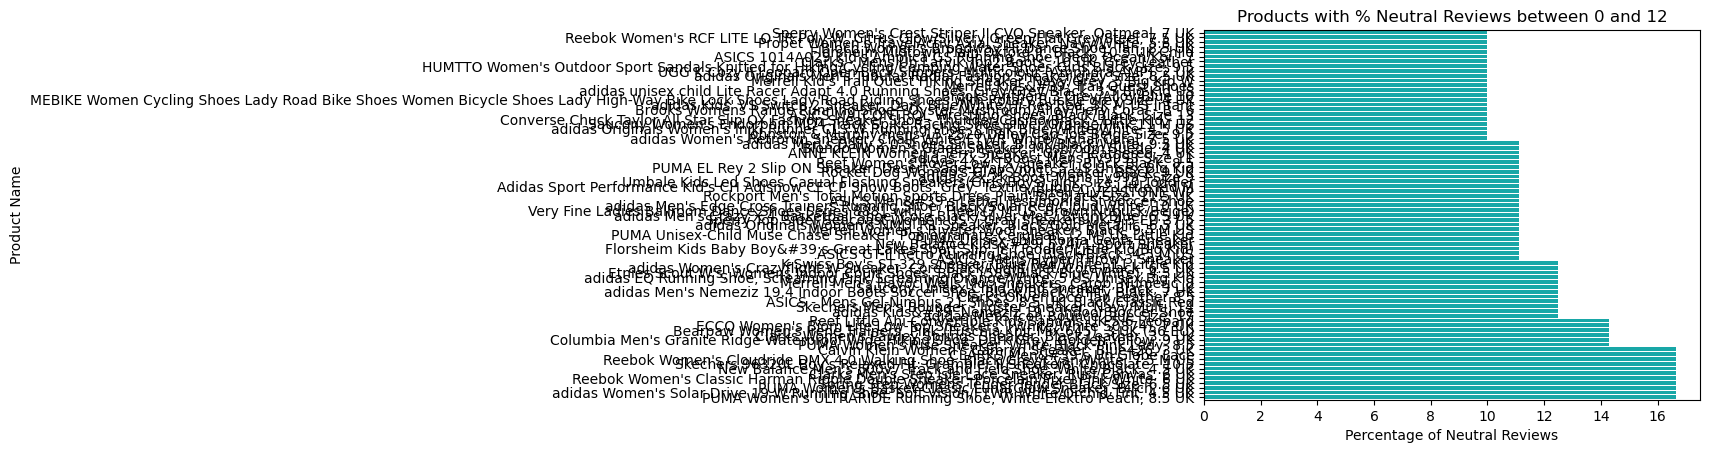

In [25]:
# using seaborn,this information can be plotted on a graph horizontally

# Assuming 'percent_negative' is your DataFrame
filtered_percent_neutral = percent_neutral[(percent_neutral['% neutral reviews'] > 0) & (percent_neutral['% neutral reviews'] < 20)]

# Plotting the horizontal barplot
sns.barplot(x='% neutral reviews', y=filtered_percent_neutral.index, data=filtered_percent_neutral, color='c')

# Adding labels and title
plt.xlabel('Percentage of Neutral Reviews')
plt.ylabel('Product Name')
plt.title('Products with % Neutral Reviews between 0 and 12')

# Display the plot
plt.show()


In [27]:
# creating a function that applies all the data preprocessing steps that we can then use on a corpus

stop_words = nltk.corpus.stopwords.words('english')

def preprocess_text(text):
    tokenized_document = nltk.tokenize.RegexpTokenizer('[a-zA-Z0-9\']+').tokenize(text) #Tokenize
    cleaned_tokens = [word.lower() for word in tokenized_document if word.lower() not in stop_words] # Remove
    stemmed_text = [nltk.stem.PorterStemmer().stem(word) for word in cleaned_tokens] #Stemming
    return stemmed_text

stop_words = nltk.corpus.stopwords.words('english')
reviews['processed_review'] = reviews['review_text'].apply(preprocess_text)

reviews_positive_subset = reviews.loc[(reviews['product_name']=='Reebok Women\'s Fusion Flexweave Running Shoe, Smokey Volcano/Twstd Berry/R, 7 UK')
                                       & (reviews['compound']>0),:]

reviews_negative_subset = reviews.loc[(reviews['product_name']=='Reebok Women\'s Fusion Flexweave Running Shoe, Smokey Volcano/Twstd Berry/R, 7 UK')
                                       & (reviews['compound']>0),:]

reviews_positive_subset.head()

,product_name,review_date,reviewer_name,review_title,review_text,verified_purchase,compound,neg,neu,pos,processed_review
695,"Reebok Women's Fusion Flexweave Running Shoe, ...",Reviewed in the United States on 28 October 2021,Angels best,Reebok I love u,Best gym shoe for walking and standing for lon...,True,0.6369,0.0,0.724,0.276,"[best, gym, shoe, walk, stand, long, period, t..."
696,"Reebok Women's Fusion Flexweave Running Shoe, ...",Reviewed in the United States on 7 January 2019,DLR,Great Shoes for price,Shoes are nice and comfortable. I use them as ...,True,0.7269,0.0,0.567,0.433,"[shoe, nice, comfort, use, walk, shoe]"
697,"Reebok Women's Fusion Flexweave Running Shoe, ...",Reviewed in the United States on 17 June 2019,Temp1221,Nice shoe!,Have received lots of compliments. Good fit an...,True,0.8860,0.0,0.305,0.695,"[receiv, lot, compliment, good, fit, comfort]"
698,"Reebok Women's Fusion Flexweave Running Shoe, ...",Reviewed in the United States on 2 July 2019,Jessica Rodriguez,Awesome shoes and very lightweight (:,Love them! Great style and the memory foam was...,True,0.8622,0.0,0.482,0.518,"[love, great, style, memori, foam, plu]"
699,"Reebok Women's Fusion Flexweave Running Shoe, ...",Reviewed in the United States on 2 January 2019,Amazon Customer,Good quality!!,excellent tennis !!,True,0.6467,0.0,0.318,0.682,"[excel, tenni]"


In [94]:
# Assuming 'reviews' is your DataFrame with a '% negative_reviews' column
for product_name, group in reviews.groupby('product_name'):
    negative_reviews_text = ' '.join(group['review_text'])
    
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews_text)

negative_reviews_text

"I rant and rave to all my friends about these shoes! They are by far the most comfortable shoes I have ever bought. I’m an orthodontic technician so I’m constantly up and down on and off my feet for 10+ hours a day depending on the day. I have never had a pair of shoes that helped my feet, legs, and back from hurting after a long shift till I bought these. Best part is I bought a second pair for my everyday shoes also! “My New Lightweight Sneakers “ I a size 8 Medium, I received these today, I tried the shoes on, the shoes have nice arch support, lightweight, comfortable, nice mauve color, I bought a size 8, my shoes fit true to size, I will purchase another pair in the future, the sneakers also make nice house slippers, also have minimal stretch, I received a nice compliment on my shoes.😊 I got these to wear around the house instead of going barefoot on the hardwood. They are very comfortable and cute. For my purposes I had hoped they would slip on and off a bit easier. I still have 

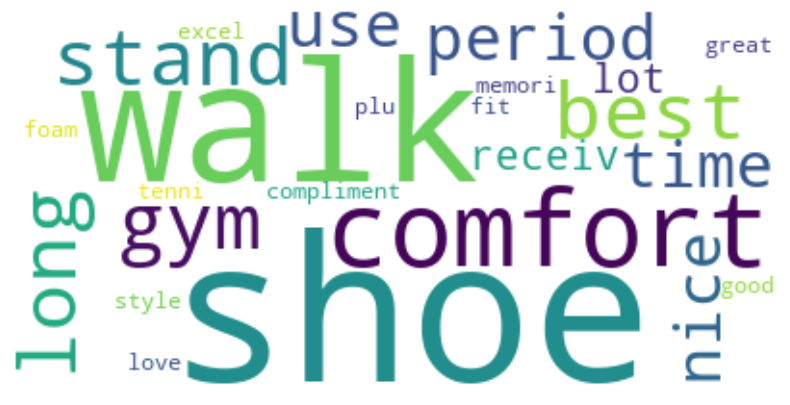

In [44]:
# WordCloud for words with negative reviews per product

neg_tokens = [word for review in reviews_negative_subset['processed_review'] for word in review]

wordcloud = WordCloud(background_color='white').generate_from_text(' '.join(neg_tokens))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

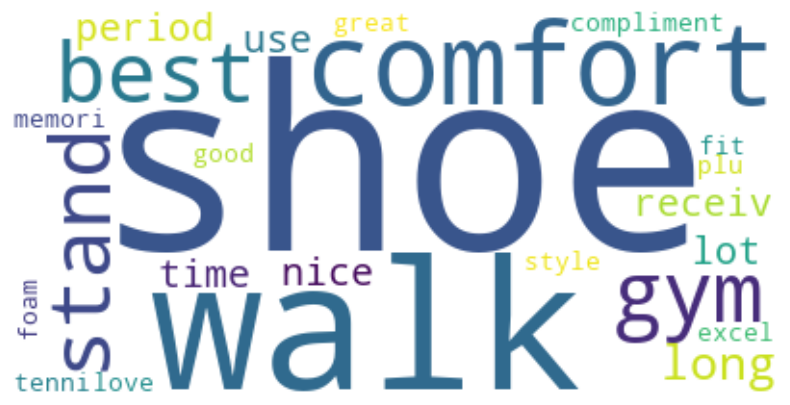

In [45]:
# WordCloud for words with positive reviews per product

pos_tokens = [word for review in reviews_positive_subset['processed_review'] for word in review]

wordcloud = WordCloud(background_color='white').generate_from_text(' '.join(pos_tokens))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [46]:
# Use the nltk FreqDist to underdtand word frequencies then tabulate
from nltk.probability import FreqDist

neg_freqdist = FreqDist(neg_tokens)

neg_freqdist.tabulate(10)

   shoe    walk comfort    best     gym   stand    long  period    time    nice 
      3       2       2       1       1       1       1       1       1       1 


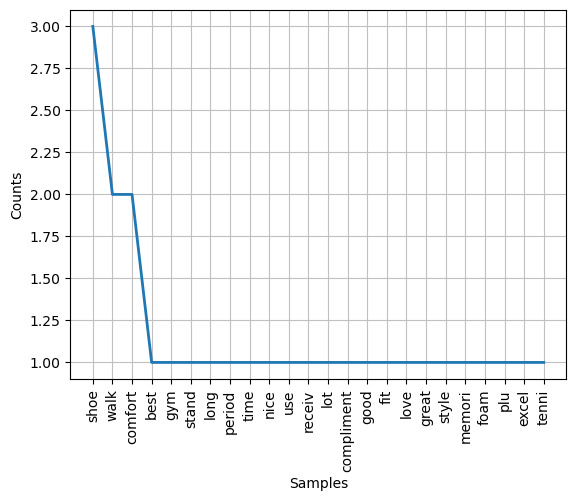

<Axes: xlabel='Samples', ylabel='Counts'>

In [38]:
# Use the plot method to create a frequency distribution plot for the modt occuring words


neg_freqdist.plot(30)


In [47]:
# Use the nltk FreqDist to underdtand word frequencies then tabulate
from nltk.probability import FreqDist

pos_freqdist = FreqDist(pos_tokens)

pos_freqdist.tabulate(10)

   shoe    walk comfort    best     gym   stand    long  period    time    nice 
      3       2       2       1       1       1       1       1       1       1 


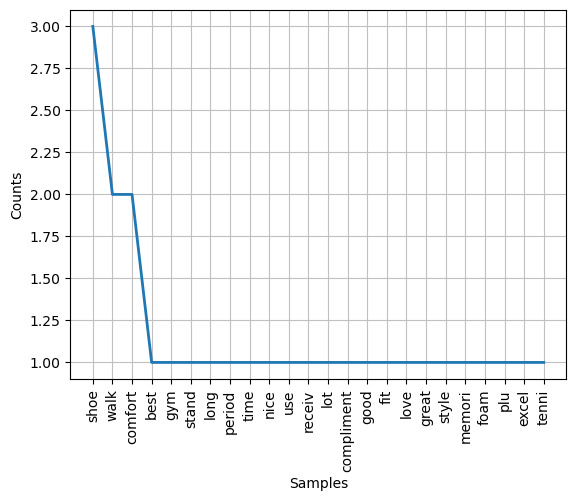

<Axes: xlabel='Samples', ylabel='Counts'>

In [48]:
# Plotting the graph for positive reviews

pos_freqdist.plot(30)